In [237]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

%config InlineBackend.figure_format = 'svg'

## 读取数据

In [238]:
data = pd.read_csv('2.csv')
data

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181,3750,MALE
1,Adelie,Torgersen,39.5,17.4,186,3800,FEMALE
2,Adelie,Torgersen,40.3,18.0,195,3250,FEMALE
3,Adelie,Torgersen,36.7,19.3,193,3450,FEMALE
4,Adelie,Torgersen,39.3,20.6,190,3650,MALE
...,...,...,...,...,...,...,...
337,Gentoo,Biscoe,47.2,13.7,214,4925,FEMALE
338,Gentoo,Biscoe,46.8,14.3,215,4850,FEMALE
339,Gentoo,Biscoe,50.4,15.7,222,5750,MALE
340,Gentoo,Biscoe,45.2,14.8,212,5200,FEMALE


## 数据清洗

In [246]:
# 处理数据：删除异常数据、保留需要的数据、将字符串映射为数字
my_data = data.dropna()
my_data = my_data.loc[:, ['species', 'bill_length_mm', 'bill_depth_mm']]
my_data['species'] = my_data['species'].map({'Adelie': 1, 'Chinstrap': 2, 'Gentoo': 3})
my_data

,species,bill_length_mm,bill_depth_mm
0,1,39.1,18.7
1,1,39.5,17.4
2,1,40.3,18.0
3,1,36.7,19.3
4,1,39.3,20.6
...,...,...,...
337,3,47.2,13.7
338,3,46.8,14.3
339,3,50.4,15.7
340,3,45.2,14.8


In [240]:
# 标准化数据
scaler = StandardScaler()
x = np.array(my_data.loc[:, ['bill_length_mm', 'bill_depth_mm']])
x = scaler.fit_transform(x)
y = np.array(my_data['species'])

In [249]:
x

array([[-8.96041890e-01,  7.80732104e-01],
       [-8.22787867e-01,  1.19583967e-01],
       [-6.76279821e-01,  4.24729261e-01],
       [-1.33556603e+00,  1.08587740e+00],
       [-8.59414878e-01,  1.74702554e+00],
       [-9.32668901e-01,  3.23014163e-01],
       [-8.77728384e-01,  1.23845005e+00],
       [-5.29771775e-01,  2.21299065e-01],
       [-9.87609419e-01,  2.05217083e+00],
       [-1.72014965e+00,  2.00131328e+00],
       [-1.35387953e+00,  3.23014163e-01],
       [-9.69295913e-01,  9.33304752e-01],
       [-2.73382694e-01,  1.79788309e+00],
       [-1.75677666e+00,  6.28159457e-01],
       [ 3.67590007e-01,  2.20474348e+00],
       [-1.13411746e+00,  5.77301908e-01],
       [-1.15243097e+00,  7.80732104e-01],
       [-1.48207407e+00,  1.03501985e+00],
       [-1.06086344e+00,  4.75586810e-01],
       [-9.50982407e-01,  1.78688686e-02],
       [-1.59195511e+00,  8.82447203e-01],
       [-6.21339303e-01,  7.29874555e-01],
       [-6.39652809e-01,  3.73871712e-01],
       [-1.

In [250]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

## 划分训练集和测试集，创建SVM模型并训练

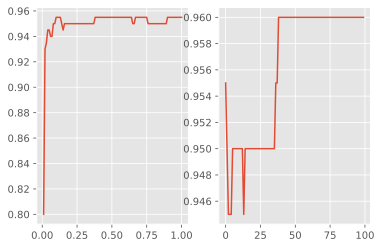

In [241]:
# 划分训练集和测试集
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=18, test_size=0.6)
scores = []
c = 1
fig = plt.figure()

# 筛选合适的模型
for i in np.linspace(0.01, 1, 100):
    # 创建SVM模型
    model = SVC(C=i, kernel='linear', gamma='auto', probability=True)
    clf = model.fit(x_train, y_train)
    # print(model.score(x_test, y_test))
    scores.append(model.score(x_test, y_test))
ax = fig.add_subplot(1, 2, 1)
ax.plot(np.linspace(0.01, 1, 100), scores)
for i in np.linspace(1, 100, 100):
    # 创建SVM模型
    model = SVC(C=i, kernel='linear', gamma='auto', probability=True)
    clf = model.fit(x_train, y_train)
    # print(model.score(x_test, y_test))
    scores.append(model.score(x_test, y_test))
ax = fig.add_subplot(1, 2, 2)
ax.plot(scores[100:])

In [242]:
# 创建SVM模型
model = SVC(C=0.1, kernel='linear', gamma='auto', probability=True)
clf = model.fit(x_train, y_train)
print(model.score(x_test, y_test))

0.955


In [243]:
# 预测错误的值
res_df = pd.DataFrame(np.concatenate((y_test.reshape(-1, 1), model.predict(x_test).reshape(-1, 1)), axis=1),
                      columns=['预测值', '真实值'])
res_df = res_df[res_df['预测值'] != res_df['真实值']]
res_df['预测值'] = res_df['预测值'].map({1: 'Adelie', 2: 'Chinstrap', 3: 'Gentoo'})
res_df['真实值'] = res_df['真实值'].map({1: 'Adelie', 2: 'Chinstrap', 3: 'Gentoo'})
res_df

,预测值,真实值
17,Chinstrap,Adelie
26,Chinstrap,Gentoo
43,Gentoo,Chinstrap
49,Chinstrap,Gentoo
50,Chinstrap,Adelie
90,Chinstrap,Gentoo
112,Chinstrap,Adelie
174,Chinstrap,Gentoo
189,Adelie,Chinstrap


## 绘图部分

In [244]:
# 转化之前映射的种类为字符串
my_data['species'] = my_data['species'].map({1: 'Adelie', 2: 'Chinstrap', 3: 'Gentoo'})

Text(0.5, 1.0, 'Linear SVM')

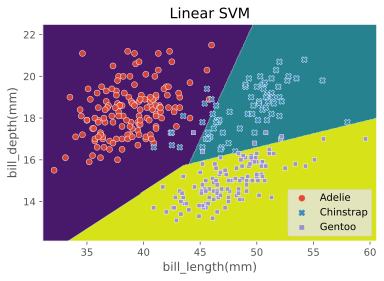

In [245]:
# 绘制散点图
plt.style.use('ggplot')
# plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap="rainbow")
ax = plt.gca()
xlim = [my_data['bill_length_mm'].min(), my_data['bill_length_mm'].max()]
ylim = [my_data['bill_depth_mm'].min(), my_data['bill_depth_mm'].max()]

xx, yy = np.meshgrid(np.linspace(xlim[0] - 1, xlim[1] + 1, 300), np.linspace(ylim[0] - 1, ylim[1] + 1, 300))
X = scaler.fit_transform(np.c_[xx.flatten(), yy.flatten()])
Z = clf.predict(X)
zz = Z.reshape(xx.shape)
ax.contourf(xx, yy, zz)
sns.scatterplot(x='bill_length_mm',  # 指定x轴变量
                y='bill_depth_mm',  # 指定y轴变量
                hue='species',  # 指定分组变量
                style="species",  # 根据分组变量改变对应标记
                data=my_data,  # 指定绘图数据集
                alpha=0.9,  # 设置透明度
                )

plt.legend(loc='lower right')

ax.set_xlabel("bill_length(mm)")
ax.set_ylabel("bill_depth(mm)")
ax.set_title("Linear SVM")